In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import feather

In [2]:
reviews = feather.read_dataframe('../data/reviews.feather')
reviews.head()

,beer_id,comment,rating,user_id
0,1300529,None,3.75,Vasen_pakki
1,1300529,None,3.50,Dave-Hill
2,1300529,None,3.75,jsapas
3,1300529,None,3.25,vanatyhi1
4,1300529,BB 30/10/2016. Üpris kentsakas überrüübe,3.75,stennibal


In [3]:
beer_info = feather.read_dataframe('../data/beer-info.feather')
df = reviews.merge(beer_info[['id','name']], left_on='beer_id', right_on='id')[['name','user_id','rating','comment']]
df.head()

,name,user_id,rating,comment
0,Surf Wax DIPA,Vasen_pakki,3.75,None
1,Surf Wax DIPA,Dave-Hill,3.50,None
2,Surf Wax DIPA,jsapas,3.75,None
3,Surf Wax DIPA,vanatyhi1,3.25,None
4,Surf Wax DIPA,stennibal,3.75,BB 30/10/2016. Üpris kentsakas überrüübe


In [4]:
df.groupby('name')[['rating']].agg('mean').head()

,rating
name,
(New) English Bulldog Hazy IPA,3.609375
01 18 Off-Tempo DIPA,3.327778
04609 Double IPA,3.771390
06 18 Off Tempo DIPA 2,3.533333
077XX,4.111429


In [5]:
beer_info.groupby('name')[['rating']].agg('mean').head()

,rating
name,
(New) English Bulldog Hazy IPA,3.60
01 18 Off-Tempo DIPA,3.36
04609 Double IPA,3.61
06 18 Off Tempo DIPA 2,3.31
077XX,4.05


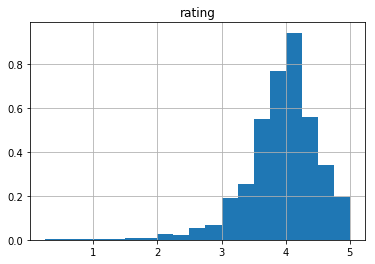

In [6]:
fig = df.hist(column='rating',bins=np.linspace(0.25,5,20),density=True)

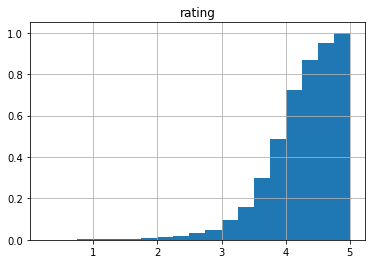

In [7]:
fig = df.hist(column='rating',bins=np.linspace(0.25,5,20),density=True,cumulative=True)

In [8]:
sparse_matrix = df.sort_values('user_id').pivot_table(index='name', columns='user_id', values='rating')
sparse_matrix

user_id,--------,-Alix-,-Chubbs-,-Jamin,-MOTA-,-Piels-,-TheDude-,-Z-inNYC,-dtp,-stonemason-,...,zwhite1992,zwk1231,zyankali7,zymman,zymurgeek,zymurgenius,zysurge,zytle,zzzigga,zzzzbeer
name,,,,,,,,,,,,,,,,,,,,,
(New) English Bulldog Hazy IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 18 Off-Tempo DIPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04609 Double IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06 18 Off Tempo DIPA 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
077XX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12th of Never Ale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Point Imperial IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1694 New England DIPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
beers = sparse_matrix.index
users = sparse_matrix.columns
ratings = sparse_matrix.replace(np.nan, 0)
print('Shape: {}'.format(ratings.shape))
ratings.head()

Shape: (664, 72128)


user_id,--------,-Alix-,-Chubbs-,-Jamin,-MOTA-,-Piels-,-TheDude-,-Z-inNYC,-dtp,-stonemason-,...,zwhite1992,zwk1231,zyankali7,zymman,zymurgeek,zymurgenius,zysurge,zytle,zzzigga,zzzzbeer
name,,,,,,,,,,,,,,,,,,,,,
(New) English Bulldog Hazy IPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01 18 Off-Tempo DIPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04609 Double IPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06 18 Off Tempo DIPA 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
077XX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
%%time
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=100)

# Fit the model to articles
model.fit(ratings)

# Transform the articles: nmf_features
nmf_features = model.transform(ratings)

# Print the NMF features
print(nmf_features)

[[1.98473312e-02 2.09763326e-02 2.98711021e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.84204553e-03 2.43891855e-02 0.00000000e+00 ... 3.46975463e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.17456371e-02 ... 8.82540792e-05
  0.00000000e+00 8.65941408e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.10379288e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.65888339e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Wall time: 4min 15s


In [11]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=beers)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
name,,,,,,,,,,,,,,,,,,,,,
(New) English Bulldog Hazy IPA,0.019847,0.020976,0.002987,0.000000,0.000000,0.016098,0.000000,0.0,0.000000,0.0,...,0.004302,0.000000,0.000000,0.000000,0.000000,0.035049,0.000000,0.000000,0.000000,0.000000
01 18 Off-Tempo DIPA,0.007842,0.024389,0.000000,0.000000,0.000000,0.000000,0.002474,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032273,0.346975,0.000000,0.000000
04609 Double IPA,0.000000,0.000000,0.011746,0.000000,0.021638,0.000000,0.000000,0.0,0.041363,0.0,...,0.000000,0.000414,0.025418,0.000000,0.000000,0.000000,0.000000,0.000088,0.000000,0.000866
06 18 Off Tempo DIPA 2,0.000000,0.000008,0.000000,0.000078,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.001131,0.000144,0.003771,0.009725,0.000383,0.000477
077XX,0.000000,0.017817,0.000000,0.163298,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.004091,0.319021,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=users)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(100, 72128)
user_id
TheCyclone    0.619811
Jbsrv33       0.617401
Jmfgohawks    0.610214
bheffleger    0.609961
Alesha3457    0.609667
Name: 3, dtype: float64


In [13]:
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=beers)

# Select the row corresponding to 'Cristiano Ronaldo': article
beer = df.loc['A Hopwork Orange']

# Compute the dot products: similarities
similarities = df.dot(beer)

# Display those with the largest cosine similarity
print(similarities.nlargest())

name
A Hopwork Orange                1.000000
Mooie Nel IPA / Northsea IPA    0.971638
Beta Max                        0.919128
Eight Point IPA                 0.507904
16 Point Imperial IPA           0.407503
dtype: float64


In [14]:
%%time
# Perform the necessary imports
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=100)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(ratings)


Wall time: 4min 19s


In [15]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=beers)

# Select row of 'Bruce Springsteen': artist
beer = df.loc['A Hopwork Orange']

# Compute cosine similarities: similarities
similarities = df.dot(beer)

# Display those with highest cosine similarity
print(similarities.nlargest())

name
A Hopwork Orange         1.000000
Beta Max                 0.994331
Hazy Future IPA          0.991568
Eight Point IPA          0.974673
16 Point Imperial IPA    0.933135
dtype: float64
